<a href="https://colab.research.google.com/github/22922511/House_price_prediction/blob/main/notebook/Bengaluru%20House%20price%20MODEL%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [154]:
print("pandas",pd.__version__)
print("numpy",np.__version__)
print("sklearn",sklearn.__version__)


pandas 2.2.2
numpy 2.0.2
sklearn 1.6.1


In [155]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')

In [156]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
5195,Plot Area,Ready To Move,Varthur Road,4 Bedroom,NaN,1300,3.0,0.0,75.00
8362,Built-up Area,Ready To Move,Kanaka Nagar,4 Bedroom,NaN,1600,4.0,2.0,90.00
864,Built-up Area,Ready To Move,Kodichikkanahalli,2 BHK,Prs 2hi,995,2.0,1.0,41.00
8260,Super built-up Area,Ready To Move,Kudlu Gate,2 BHK,NaN,1215,2.0,1.0,45.00
10966,Super built-up Area,19-Nov,Chandapura,3 BHK,NaN,1033,2.0,2.0,30.47


In [157]:



df.shape

(13320, 9)

In [158]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [159]:
##
df=df.drop(columns=['availability','society','area_type'])

In [160]:
df.sample(5)

,location,size,total_sqft,bath,balcony,price
4806,Banashankari,2 BHK,1041,2.0,1.0,36.44
10522,Marathahalli,4 BHK,2524,5.0,2.0,180.00
6513,Marathahalli,3 BHK,1469,3.0,1.0,89.00
2101,Hulimavu,2 BHK,1255,2.0,2.0,73.00
8764,Yeshwanthpur,3 BHK,1855,3.0,3.0,140.00


In [161]:
df.isnull().sum()

,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [162]:
df.dropna(inplace=True)
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [163]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

##Extracted BHK value from size

In [164]:
df['BHK']=df['size'].apply(lambda bhk : int(bhk.split()[0]))

In [165]:
##
df=df.drop(columns=['size'])

In [166]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
10768,Ambalipura,1700,2.0,2.0,76.0,2
110,Lakshmiamma Garden,1800,3.0,3.0,120.0,3
4553,Sarjapur Road,1200,2.0,1.0,93.0,2
12798,Haralur Road,1735,3.0,2.0,97.0,3
8172,Thubarahalli,2625,3.0,3.0,175.0,3


In [167]:
df.isnull().sum()

,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


## finding the average of total_sqft value of range given

In [168]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [169]:
## check to float
def check_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [170]:
df[~df['total_sqft'].apply(check_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [171]:
## taking avearge of range
def to_float(x):
  tokn=x.split('-')
  if len(tokn)==2 :
    return (float(tokn[0])+(float(tokn[1])))/2
  try :
    return float(x)
  except:
    return None

In [172]:
df['total_sqft']=df['total_sqft'].apply(to_float)

In [173]:
df.iloc[30]

,33
location,Raja Rajeshwari Nagar
total_sqft,1693.0
bath,3.0
balcony,3.0
price,57.39
BHK,3


In [174]:
df.isnull().sum()

,0
location,0
total_sqft,42
bath,0
balcony,0
price,0
BHK,0


In [175]:
df.sample(5)

,location,total_sqft,bath,balcony,price,BHK
9871,Iblur Village,5384.0,5.0,3.0,420.0,5
3942,Begur Road,800.0,5.0,2.0,95.0,5
1838,Old Madras Road,3630.0,6.0,1.0,195.0,4
9809,Konena Agrahara,1000.0,2.0,1.0,50.0,2
6161,Harlur,1762.0,3.0,2.0,133.0,3


In [176]:
df.shape

(12710, 6)

In [177]:
df.dropna(inplace=True)

In [178]:
df.shape

(12668, 6)

<Axes: >

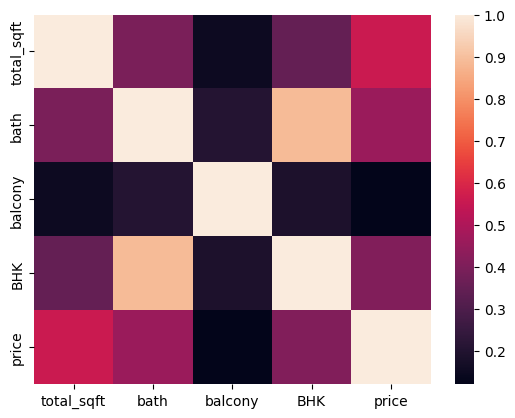

In [179]:
##
sns.heatmap(df[['total_sqft','bath','balcony','BHK','price']].corr())

In [180]:
##
df['BHK'].corr(df['bath'])

np.float64(0.8873814372102272)

## corelation between price and balcony is very low that support  to drop

In [181]:
##
print('correlation between balcony and price ' ,df['balcony'].corr(df['price']))
print('correlation between total_sqft and price ' ,df['total_sqft'].corr(df['price']))
print('correlation between BHK and price ' ,df['BHK'].corr(df['price']))
print('correlation between bath and price ' ,df['bath'].corr(df['price']))



correlation between balcony and price  0.12040737989186838
correlation between total_sqft and price  0.5585554366599386
correlation between BHK and price  0.40664509442161734
correlation between bath and price  0.4593201142416952


In [182]:
df1=df.drop(columns=['balcony'])

In [183]:
df.isnull().sum()

,0
location,0
total_sqft,0
bath,0
balcony,0
price,0
BHK,0


In [184]:
df1.sample(5)

,location,total_sqft,bath,price,BHK
1486,Maruthi HBCS Layout,1250.0,3.0,39.50,3
6854,Jakkasandra Extension,2679.0,5.0,280.00,4
5671,Jnanabharathi Layout,2200.0,5.0,100.00,4
5470,Whitefield,825.0,1.0,44.90,1
11747,Thanisandra,1430.0,2.0,51.48,3


In [185]:
df1=df1.dropna()

In [186]:
df1.isnull().sum()

,0
location,0
total_sqft,0
bath,0
price,0
BHK,0


##Feature Engineering

## Creating a new featue price per square feet area

In [187]:
df1['price_per_sqft']=df1['price']*100000/df['total_sqft']

In [188]:
df1.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
9290,Sarjapur Road,1826.0,3.0,130.0,3,7119.386637
2780,HSR Layout,1372.0,2.0,61.0,2,4446.064140
9640,8th Phase JP Nagar,1200.0,6.0,260.0,6,21666.666667
2797,Bikasipura,4200.0,4.0,255.0,4,6071.428571
12693,Vittasandra,1246.0,2.0,67.4,2,5409.309791


## we have around 1300 different value in location so to replacing it with other if count of any location less then 15

In [189]:
location_count=df1['location'].value_counts().reset_index()
location_count.columns = ['location', 'count']

In [190]:
location_less_then_15=location_count[location_count['count']< 15].location.tolist()

In [191]:
df1.location=df1['location'].apply(lambda x : 'others' if x in location_less_then_15 else x )

In [192]:
df1['location'].value_counts()

,count
location,
others,3459
Whitefield,513
Sarjapur Road,372
Electronic City,300
Kanakpura Road,259
...,...
Arekere,15
Varthur Road,15
Kasturi Nagar,15


In [193]:
df1['location'].value_counts()

,count
location,
others,3459
Whitefield,513
Sarjapur Road,372
Electronic City,300
Kanakpura Road,259
...,...
Arekere,15
Varthur Road,15
Kasturi Nagar,15


In [194]:
print(df1.shape)
df1.sample(2)

(12668, 6)


,location,total_sqft,bath,price,BHK,price_per_sqft
7452,Whitefield,3589.0,5.0,400.0,4,11145.165784
10746,others,1125.0,2.0,55.0,2,4888.888889


## for typically one bedroom sqft range from 300 to 400 in bengaluru from source nobrocker
https://www.nobroker.in/1bhk-flats-for-rent-in-bangalore_bangalore#signup-login

In [195]:
#df2=df1[(df1['total_sqft']/df1['BHK'])>=200]

df1['1BHK_size']=(df1['total_sqft']/df1['BHK'])
df2=df1

In [196]:
df2['1BHK_size'].describe()

,1BHK_size
count,12668.000000
mean,570.060291
std,380.298999
min,0.714286
25%,473.333333
50%,550.000000
75%,622.500000
max,26136.000000


In [197]:
         q1=df2['1BHK_size'].quantile(.25)
         q3=df2['1BHK_size'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.2 * IQR
         upper_bound = q3 + 2.2* IQR
         print(f'lower_limit {lower_bound} and upper_limit {upper_bound}')
         df2=df2[(df2['1BHK_size'] >=lower_bound) & (df2['1BHK_size']<=upper_bound)]



lower_limit 294.33333333333326 and upper_limit 950.6666666666667


<Axes: xlabel='1BHK_size', ylabel='Count'>

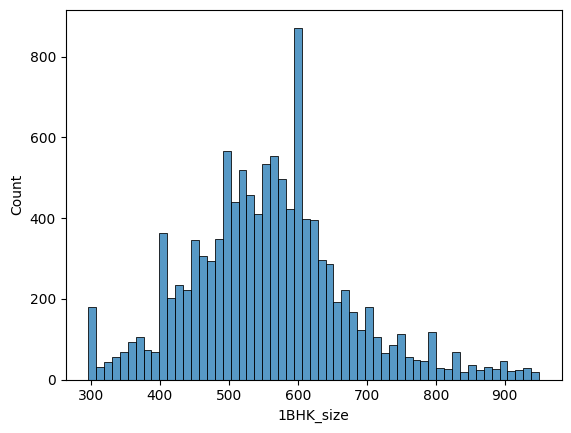

In [198]:
sns.histplot(df2['1BHK_size'])

In [199]:
df2.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
10861,others,1469.0,2.0,99.14,2,6748.808713,734.500000
9548,others,2000.0,3.0,90.00,4,4500.000000,500.000000
7288,Sarjapur Road,1685.0,3.0,135.00,3,8011.869436,561.666667
10331,others,1170.0,2.0,45.51,2,3889.743590,585.000000
9191,Yelahanka,1560.0,2.0,98.00,3,6282.051282,520.000000


In [200]:
df2.shape

(11603, 7)

In [201]:
df2['price_per_sqft'].describe()

,price_per_sqft
count,11603.000000
mean,6086.242448
std,3846.903987
min,500.000000
25%,4185.721589
50%,5208.333333
75%,6705.710856
max,176470.588235


## outlier removing

In [202]:
def removes_outliers_location(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('location'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [203]:
def removes_outliers_bhk(df):
    df_new = pd.DataFrame()
    c=0;
    for key, subdf in df.groupby('BHK'):
         q1=subdf['price_per_sqft'].quantile(.25)
         q3=subdf['price_per_sqft'].quantile(.75)
         IQR=q3-q1
         lower_bound = q1 - 1.5 * IQR
         upper_bound = q3 + 1.5 * IQR
         df_per_key=subdf[(subdf['price_per_sqft'] >=lower_bound) & (subdf['price_per_sqft']<=upper_bound)]
         df_new=pd.concat([df_new ,df_per_key],ignore_index=True)
         print(f"{key}: {len(subdf) - len(df_per_key)} rows removed")


    return df_new


In [204]:
df3=removes_outliers_location(df2)
df3=removes_outliers_bhk(df3)


1st Phase JP Nagar: 3 rows removed
2nd Stage Nagarbhavi: 2 rows removed
5th Phase JP Nagar: 2 rows removed
6th Phase JP Nagar: 0 rows removed
7th Phase JP Nagar: 4 rows removed
8th Phase JP Nagar: 7 rows removed
9th Phase JP Nagar: 2 rows removed
Abbigere: 5 rows removed
Akshaya Nagar: 8 rows removed
Ambalipura: 3 rows removed
Ambedkar Nagar: 4 rows removed
Amruthahalli: 2 rows removed
Anandapura: 0 rows removed
Ananth Nagar: 3 rows removed
Anekal: 3 rows removed
Anjanapura: 3 rows removed
Ardendale: 2 rows removed
Arekere: 0 rows removed
Attibele: 5 rows removed
BTM 2nd Stage: 1 rows removed
BTM Layout: 1 rows removed
Babusapalaya: 1 rows removed
Balagere: 1 rows removed
Banashankari: 7 rows removed
Banashankari Stage II: 1 rows removed
Banashankari Stage III: 3 rows removed
Banashankari Stage VI: 3 rows removed
Banaswadi: 3 rows removed
Bannerghatta: 0 rows removed
Bannerghatta Road: 7 rows removed
Basavangudi: 1 rows removed
Basaveshwara Nagar: 0 rows removed
Battarahalli: 1 rows re

In [205]:
df3['BHK'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 27])

In [206]:
df3.shape

(10402, 7)

In [207]:
df3.groupby('BHK').count()

,location,total_sqft,bath,price,price_per_sqft,1BHK_size
BHK,,,,,,
1,521,521,521,521,521,521
2,5072,5072,5072,5072,5072,5072
3,4000,4000,4000,4000,4000,4000
4,621,621,621,621,621,621
5,90,90,90,90,90,90
6,52,52,52,52,52,52
7,21,21,21,21,21,21
8,16,16,16,16,16,16
9,6,6,6,6,6,6


In [208]:
df3=df3[df3['BHK']<=6]

In [209]:
df3.shape

(10356, 7)

In [210]:
df3.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size
3190,Old Madras Road,1100.0,2.0,70.0,2,6363.636364,550.0
2670,Kanakpura Road,700.0,2.0,40.0,2,5714.285714,350.0
9692,Haralur Road,2750.0,4.0,220.0,4,8000.000000,687.5
4614,others,850.0,2.0,33.0,2,3882.352941,425.0
2474,Kaggadasapura,1035.0,2.0,45.5,2,4396.135266,517.5


## removing outlier form bathroom
##what if bathroom =16

In [211]:
df3[df3['bath']>8]

,location,total_sqft,bath,price,BHK,price_per_sqft,1BHK_size


In [212]:
df4=df3[df3['bath']<=df3['BHK']+1]
print(f'{len(df3)-len(df4)} removed')

60 removed


In [213]:
df4.shape

(10296, 7)

(array([6.180e+02, 6.344e+03, 0.000e+00, 2.583e+03, 0.000e+00, 5.390e+02,
        1.700e+02, 0.000e+00, 3.700e+01, 5.000e+00]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

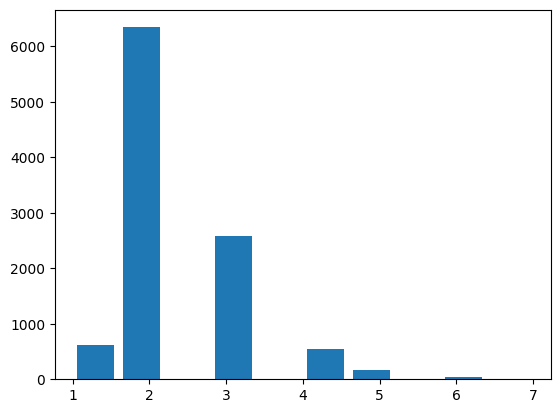

In [214]:
plt.hist(df4['bath'],rwidth=.8)

## droped  the some fearure including size

In [215]:
df5=df4.drop(columns=['price_per_sqft'])
df5=df4.drop(columns=['1BHK_size'])
# df5=df4

In [216]:
df5.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft
5311,others,1263.0,2.0,51.5,2,4077.593032
9693,Haralur Road,3400.0,5.0,240.0,4,7058.823529
5604,5th Phase JP Nagar,1550.0,3.0,75.0,3,4838.709677
10068,others,3179.0,5.0,351.0,4,11041.207927
5546,others,1165.0,2.0,45.0,2,3862.660944


In [217]:
df5['location']=df5['location'].apply(lambda x : x.lower())

 ##One hot encoding on location

In [218]:
coded_df=pd.get_dummies(df5.location)
coded_df.sample(2)

,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,abbigere,akshaya nagar,ambalipura,ambedkar nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
8788,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [219]:
df6=pd.concat([df5,coded_df.drop(columns='others')],axis='columns')

In [220]:
df6.sample(5)

,location,total_sqft,bath,price,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
6135,budigere,1820.0,3.0,85.20,3,4681.318681,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5338,others,1150.0,2.0,42.00,2,3652.173913,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4806,others,1076.0,2.0,52.00,2,4832.713755,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2860,koramangala,1260.0,2.0,100.00,2,7936.507937,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
209,kasavanhalli,770.0,1.0,43.82,1,5690.909091,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [221]:
df6.drop(columns=['location'],inplace=True)

In [222]:
df6.sample(5)

,total_sqft,bath,price,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
673,1126.0,2.0,55.00,2,4884.547069,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8353,1360.0,2.0,85.00,3,6250.000000,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2471,1325.0,2.0,50.00,2,3773.584906,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8191,1930.0,4.0,122.00,3,6321.243523,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4192,1187.0,2.0,37.85,2,3188.711036,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [223]:
df6.shape

(10296, 182)

In [224]:
X=df6.drop(columns=['price'])
Y=df6['price']

In [225]:
print(X.shape,Y.shape)

(10296, 181) (10296,)


In [226]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=.2,random_state=20)

In [227]:
print(f'train size {X_train.shape}: test size {X_test.shape}')

train size (8236, 181): test size (2060, 181)


In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


model=LinearRegression()
model.fit(X_train,y_train)
print(f'r2 score on test {model.score(X_test,y_test)} and on train {model.score(X_train,y_train)}')
scores = cross_val_score(model, X_test, y_test, cv=5)
print(f"Cross-validation accuracy: {scores.mean():.2f}")

r2 score on test 0.9581930019568463 and on train 0.9545856344163732
Cross-validation accuracy: 0.95


In [229]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print(f'r2 score on test {tree.score(X_test,y_test)} and on train {tree.score(X_train,y_train)}')

r2 score on test 0.9962656416297336 and on train 1.0


In [230]:
from sklearn.linear_model import Lasso, Ridge
ridge = Ridge(alpha=.75)
ridge.fit(X_train, y_train)
print(f'r2 score on test {ridge.score(X_test,y_test)} and on train {ridge.score(X_train,y_train)}')

r2 score on test 0.9583384763622381 and on train 0.9545777060130491


In [231]:
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print(f'r2 score on test {lasso.score(X_test,y_test)} and on train {lasso.score(X_train,y_train)}')

r2 score on test 0.9544950478658671 and on train 0.9476545465731289


In [232]:
X_test.sample()

,total_sqft,bath,BHK,price_per_sqft,1st phase jp nagar,5th phase jp nagar,6th phase jp nagar,7th phase jp nagar,8th phase jp nagar,9th phase jp nagar,...,varthur,varthur road,vidyaranyapura,vijayanagar,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yeshwanthpur
6161,1185.0,2.0,3,2550.21097,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [233]:
length_ip=len(X_test.columns)
data_columns=X_test.columns

In [234]:
def predict(total_sqft,bath,bhk,location):
 x=np.zeros(length_ip)
 location=location.lower()
 index_of_location=np.where(data_columns==location)[0][0]
 x[0]=total_sqft
 x[1]=bath
 x[2]=bhk
 x[index_of_location]=1
 x_df = pd.DataFrame([x], columns=data_columns)
 return model.predict(x_df)[0]

In [235]:
predict(6000,2,4,'CV Raman Nagar')

np.float64(287.00445075832613)

##Importing model

In [242]:
import pickle
with open('House_price_prediction_model_version3.pkl','wb') as f:
   pickle.dump(model,f)


In [237]:
import json
columns_name ={
    'columns':[x for x in data_columns]
}

with open('columns_name.json','w') as f:
  json.dump(columns_name,f)


In [238]:
columns_name['columns'].index('panathur')

143

In [246]:
import pickle
with open("/content/House_price_prediction_model_version2.pkl","rb") as f:
  model=pickle.load(f);

In [247]:
model.score(X_train,y_train)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- price_per_sqft
Feature names seen at fit time, yet now missing:
- benson town
- chikka tirupathi
- cooke town
- judicial layout
- kodihalli
- ...


In [ ]:
predict(1400,2,2,"varthur")

IMPORTING REQUIREMENT FILE

In [ ]:
with open("requirements.txt",'w') as f:
  f.write("")
pip freeze > requirements.txt